## Change pixel values...
### Example dataset is 'CelebA mask'

20.04.18 jho.lee@kakao.com; git.8080.kr; blog.jholee.kr

Made just for my own needs.

---

There are unexpected labels at the boundary lines of the mask.
(like 254, 174, ...)

0 ~ 63 -> 0; 64 ~ 190 -> 1; 191 ~ 255 -> 2

0: Background / 
1: skin(face) / 
2: hair

In [1]:
import os
import sys

ROOT_DIR = os.path.join(os.getcwd(), '..')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATA_DIR = os.path.join(ROOT_DIR, 'dataset/celeba')
TRAIN_MASK_DIR = os.path.join(DATA_DIR, 'train/mask')
VAL_MASK_DIR = os.path.join(DATA_DIR, 'val/mask')

TRAIN_OUT_DIR = os.path.join(DATA_DIR, 'train/mask_')
VAL_OUT_DIR = os.path.join(DATA_DIR, 'val/mask_')

if not os.path.exists(TRAIN_OUT_DIR):
    os.makedirs(TRAIN_OUT_DIR)
if not os.path.exists(VAL_OUT_DIR):
    os.makedirs(VAL_OUT_DIR)

train_masks = os.listdir(TRAIN_MASK_DIR)
val_masks = os.listdir(VAL_MASK_DIR)

In [96]:
from PIL import Image
import numpy as np

def modify(images=[], in_dir="", out_dir="", values=[]):
    count = 0
    for image in images:
        im = Image.open(os.path.join(in_dir, image))
        ima = np.asarray(im)

        for i, v in enumerate(values):
            ima = np.where(ima==v, i, ima)
            
        im = Image.fromarray(ima)
        im.save(os.path.join(out_dir, image))

        count += 1
    print(count)        
        
def modify2(images=[], in_dir="", out_dir="", in_val=[], out_val=[]):
    count = 0
    for image in images:
        im = Image.open(os.path.join(in_dir, image))
        ima = np.asarray(im)
        
        for iv, ov in zip(in_val, out_val):
            if type(iv) == type([]):
                for v in iv:
                    ima = np.where(ima==v, ov, ima)
            else:
                ima = np.where(ima==iv, ov, ima)
            
        im = Image.fromarray(ima)
        im.save(os.path.join(out_dir, image))
        
        count += 1
    print(count)
    
def down_the_max(images=[], in_dir="", out_dir="", max_val=0):
    bads = []
    count = 0
    for image in images:
        im = Image.open(os.path.join(in_dir, image))
        ima = np.asarray(im)
        

        mx = np.max(ima[:, :])
        if mx > max_val:
            ima = np.where(ima==mx, max_val, ima)
#             print("{} mx: {} max_val: {}".format(image, mx, max_val))
            if image not in bads:
                bads.append(image)
        im = Image.fromarray(ima)
        im.save(os.path.join(out_dir, image))
        
        count += 1
    print("{} / {}".format(len(bads), count))
    
    return bads


In [97]:
modify(train_masks, TRAIN_MASK_DIR, TRAIN_OUT_DIR, [0, 128, 255])

3200


In [98]:
modify(val_masks, VAL_MASK_DIR, VAL_OUT_DIR, [0, 128, 255])

355


In [99]:
modify2(train_masks, TRAIN_MASK_DIR, TRAIN_OUT_DIR, [0, 128, list(range(255, 256))], [0, 1, 2])

3200


In [100]:
modify2(val_masks, VAL_MASK_DIR, VAL_OUT_DIR, [0, 128, list(range(255, 256))], [0, 1, 2, 2])

355


In [127]:
bts = down_the_max(train_masks, TRAIN_OUT_DIR, TRAIN_OUT_DIR, max_val=2)
bvs = down_the_max(val_masks, VAL_OUT_DIR, VAL_OUT_DIR, max_val=2)

316 / 3200
355 / 355


In [165]:
import random
rbtn = os.path.join(TRAIN_MASK_DIR, random.choice(bts))
rbt = np.asarray(Image.open(rbtn))


/home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/train/mask/121208.bmp


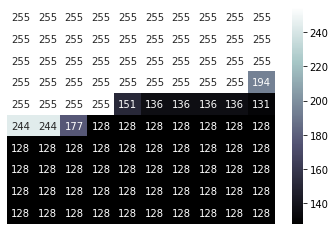

In [169]:
print(rbtn)
sns.heatmap(rbt[70:80, 70:80], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

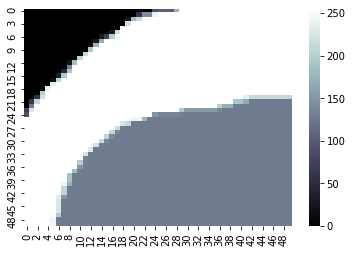

In [172]:
sns.heatmap(rbt[50:100, 50:100], fmt="d", cmap=plt.cm.bone)

In [218]:
def modify3(images=[], in_dir="", out_dir="", in_val=[], out_val=[]):
    count = 0
    
    in_val_ = []
    for i in range(0, len(in_val)-1):
        in_val_.append((in_val[i]+in_val[i+1])//2)
    in_val_.insert(0, 0)
    in_val_.append(in_val[-1])
    # [0, 128, 255] => [0, 64, 191, 255]
    
    _in_val = []
    for i in range(len(in_val_)-1):
        _in_val.append(list(range(in_val_[i], in_val_[i+1])))
    # [0, 128, 255] => [ [0,1,...,62,63], [64,65,...,189,190], [191,192,...,254,255] ]
    
        
    
    for image in images:
        im = Image.open(os.path.join(in_dir, image))
        ima = np.asarray(im)
        
        for iv, ov in zip(_in_val, out_val):
            if type(iv) == type([]):
                for v in iv:
                    ima = np.where(ima==v, ov, ima)
            else:
                ima = np.where(ima==iv, ov, ima)
            
        im = Image.fromarray(ima)
        im.save(os.path.join(out_dir, image))
        
        count += 1
    print(count)

In [222]:
modify3(train_masks, TRAIN_MASK_DIR, TRAIN_OUT_DIR, [0, 128, 256], [0, 1, 2])

3200


In [219]:
modify3(val_masks, VAL_MASK_DIR, VAL_OUT_DIR, [0, 128, 256], [0, 1, 2])

355


In [223]:
import random

val_list = os.listdir(VAL_OUT_DIR)
rand_val_path = os.path.join(VAL_OUT_DIR, random.choice(val_list))

In [224]:
rand_val_im = np.asarray(Image.open(rand_val_path))

print(rand_val_path)
print(rand_val_im.shape)


/home/jho/projects/image-segmentation-keras/train_faces/../dataset/celeba/val/mask_/135827.bmp
(218, 178)


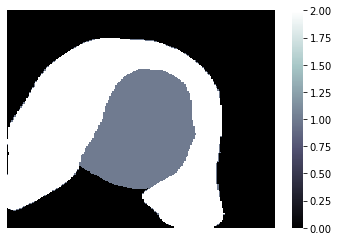

In [225]:
sns.heatmap(rand_val_im[0:218, 0:178], annot=False, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()